In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

In [75]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep='\t', names=column_names)

In [76]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [77]:
movie_titles=pd.read_csv("Movie_Id_Titles")

In [78]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [79]:
df=pd.merge(df,movie_titles,on="item_id")
df

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
...,...,...,...,...,...
99998,840,1674,4,891211682,Mamma Roma (1962)
99999,655,1640,3,888474646,"Eighth Day, The (1996)"
100000,655,1637,3,888984255,Girls Town (1996)
100001,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [80]:
n_users=df.user_id.nunique()
n_items=df.item_id.nunique()

print('Num. of Users:',str(n_users))
print('Num of Movies:',str(n_items))

Num. of Users: 944
Num of Movies: 1682


In [81]:
sns.set_style("white")

In [82]:
df.groupby(["title","item_id"])['rating'].mean().sort_values(ascending=False).head(10)

title                                              item_id
Prefontaine (1997)                                 1189       5.0
Someone Else's America (1995)                      1599       5.0
Marlene Dietrich: Shadow and Light (1996)          1201       5.0
Entertaining Angels: The Dorothy Day Story (1996)  1653       5.0
They Made Me a Criminal (1939)                     1122       5.0
Great Day in Harlem, A (1994)                      814        5.0
Star Kid (1997)                                    1293       5.0
Aiqing wansui (1994)                               1536       5.0
Saint of Fort Washington, The (1993)               1467       5.0
Santa with Muscles (1996)                          1500       5.0
Name: rating, dtype: float64

In [83]:
df.groupby(["title","item_id"])['rating'].count().sort_values(ascending=False).head(10)

title                          item_id
Star Wars (1977)               50         584
Contact (1997)                 258        509
Fargo (1996)                   100        508
Return of the Jedi (1983)      181        507
Liar Liar (1997)               294        485
English Patient, The (1996)    286        481
Scream (1996)                  288        478
Toy Story (1995)               1          452
Air Force One (1997)           300        431
Independence Day (ID4) (1996)  121        429
Name: rating, dtype: int64

In [84]:
ratings=pd.DataFrame(df.groupby(["title","item_id"])['rating'].mean())

In [85]:
ratings

,,rating
title,item_id,
'Til There Was You (1997),1300,2.333333
1-900 (1994),1353,2.600000
101 Dalmatians (1996),225,2.908257
12 Angry Men (1957),178,4.344000
187 (1997),330,3.024390
...,...,...
Young Guns II (1990),1188,2.772727
"Young Poisoner's Handbook, The (1995)",547,3.341463
Zeus and Roxanne (1997),1164,2.166667


In [86]:
ratings["num of ratings"]=pd.DataFrame(df.groupby(["title","item_id"])['rating'].count())

In [87]:
ratings.head()

,,rating,num of ratings
title,item_id,,
'Til There Was You (1997),1300,2.333333,9
1-900 (1994),1353,2.600000,5
101 Dalmatians (1996),225,2.908257,109
12 Angry Men (1957),178,4.344000,125
187 (1997),330,3.024390,41


Text(0, 0.5, 'Number of rate given')

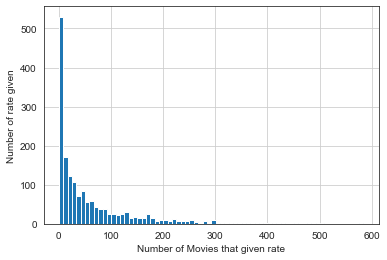

In [88]:
g=ratings["num of ratings"].hist(bins=70)
g.set_xlabel("Number of Movies that given rate")
g.set_ylabel("Number of rate given")

## Most movies get 0 or 1 rating cause most of the people watch and rate blockbbuster movies.

Text(0.5, 0, 'Average of Rates')

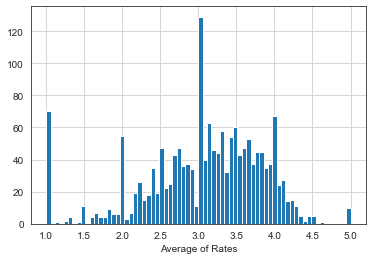

In [89]:
g=ratings["rating"].hist(bins=70)
g.set_xlabel("Average of Rates")

## Most of the ratings that are given between 3-3.5

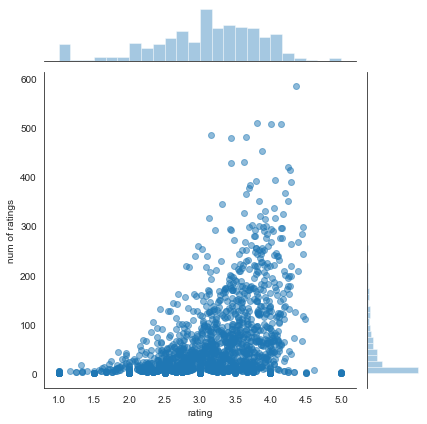

In [90]:
sns.jointplot(x="rating",y="num of ratings", data=ratings,alpha=0.5)

# Recommending Similar Movies

In [92]:
train_data, test_data = train_test_split(df, test_size=0.25)

## Memory-Based Collaborative Filtering

Memory-Based Collaborative Filtering approaches can be divided into two main sections: **user-item filtering** and **item-item filtering**. 

A *user-item filtering* will take a particular user, find users that are similar to that user based on similarity of ratings, and recommend items that those similar users liked. 

In contrast, *item-item filtering* will take an item, find users who liked that item, and find other items that those users or similar users also liked. It takes items and outputs other items as recommendations. 

* *Item-Item Collaborative Filtering*: “Users who liked this item also liked …”
* *User-Item Collaborative Filtering*: “Users who are similar to you also liked …”

A distance metric commonly used in recommender systems is *cosine similarity*, where the ratings are seen as vectors in ``n``-dimensional space and the similarity is calculated based on the angle between these vectors. 
Cosine similiarity for users *a* and *m* can be calculated using the formula below, where you take dot product of  the user vector *$u_k$* and the user vector *$u_a$* and divide it by multiplication of the Euclidean lengths of the vectors.
<img class="aligncenter size-thumbnail img-responsive" src="https://latex.codecogs.com/gif.latex?s_u^{cos}(u_k,u_a)=\frac{u_k&space;\cdot&space;u_a&space;}{&space;\left&space;\|&space;u_k&space;\right&space;\|&space;\left&space;\|&space;u_a&space;\right&space;\|&space;}&space;=\frac{\sum&space;x_{k,m}x_{a,m}}{\sqrt{\sum&space;x_{k,m}^2\sum&space;x_{a,m}^2}}"/>

To calculate similarity between items *m* and *b* you use the formula:

<img class="aligncenter size-thumbnail img-responsive" src="https://latex.codecogs.com/gif.latex?s_u^{cos}(i_m,i_b)=\frac{i_m&space;\cdot&space;i_b&space;}{&space;\left&space;\|&space;i_m&space;\right&space;\|&space;\left&space;\|&space;i_b&space;\right&space;\|&space;}&space;=\frac{\sum&space;x_{a,m}x_{a,b}}{\sqrt{\sum&space;x_{a,m}^2\sum&space;x_{a,b}^2}}
"/>

Your first step will be to create the user-item matrix. Since you have both testing and training data you need to create two matrices.  

In [96]:
train_data_matrix=np.zeros((n_users,n_items))
for line in train_data.itertuples():
    train_data_matrix[line[1]-1,line[2]-1]=line[3]
    
test_data_matrix=np.zeros((n_users,n_items))   
for line in train_data.itertuples():
    test_data_matrix[line[1]-1,line[2]-1]=line[3]

In [104]:
from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(train_data_matrix, metric='cosine')
item_similarity = pairwise_distances(train_data_matrix.T, metric='cosine')

In [105]:
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        #You use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis]) 
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])     
    return pred

In [106]:
item_prediction = predict(train_data_matrix, item_similarity, type='item')
user_prediction = predict(train_data_matrix, user_similarity, type='user')

### Evaluation
There are many evaluation metrics but one of the most popular metric used to evaluate accuracy of predicted ratings is *Root Mean Squared Error (RMSE)*. 
<img src="https://latex.codecogs.com/gif.latex?RMSE&space;=\sqrt{\frac{1}{N}&space;\sum&space;(x_i&space;-\hat{x_i})^2}" title="RMSE =\sqrt{\frac{1}{N} \sum (x_i -\hat{x_i})^2}" />

You can use the [mean_square_error](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) (MSE) function from `sklearn`, where the RMSE is just the square root of MSE. To read more about different evaluation metrics you can take a look at [this article](http://research.microsoft.com/pubs/115396/EvaluationMetrics.TR.pdf). 

Since you only want to consider predicted ratings that are in the test dataset, you filter out all other elements in the prediction matrix with `prediction[ground_truth.nonzero()]`. 

In [107]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten() 
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

In [108]:
print('User-based CF RMSE: ' + str(rmse(user_prediction, test_data_matrix)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, test_data_matrix)))

User-based CF RMSE: 3.1277425569566635
Item-based CF RMSE: 3.4545082517927757


# Model-based Collaborative Filtering

Model-based Collaborative Filtering is based on **matrix factorization (MF)** which has received greater exposure, mainly as an unsupervised learning method for latent variable decomposition and dimensionality reduction. Matrix factorization is widely used for recommender systems where it can deal better with scalability and sparsity than Memory-based CF. The goal of MF is to learn the latent preferences of users and the latent attributes of items from known ratings (learn features that describe the characteristics of ratings) to then predict the unknown ratings through the dot product of the latent features of users and items. 
When you have a very sparse matrix, with a lot of dimensions, by doing matrix factorization you can restructure the  user-item matrix into low-rank structure, and you can represent the matrix by the multiplication of two low-rank matrices, where the rows contain the latent vector. You fit this matrix to approximate your original matrix, as closely as possible, by multiplying the low-rank matrices together, which fills in the entries missing in the original matrix.

Let's calculate the sparsity level of MovieLens dataset:

In [109]:
sparsity=round(1.0-len(df)/float(n_users*n_items),3)
print('The sparsity level of MovieLens100K is ' +  str(sparsity*100) + '%')

The sparsity level of MovieLens100K is 93.7%


### SVD
A well-known matrix factorization method is **Singular value decomposition (SVD)**. Collaborative Filtering can be formulated by approximating a matrix `X` by using singular value decomposition. The winning team at the Netflix Prize competition used SVD matrix factorization models to produce product recommendations, for more information I recommend to read articles: [Netflix Recommendations: Beyond the 5 stars](http://techblog.netflix.com/2012/04/netflix-recommendations-beyond-5-stars.html) and [Netflix Prize and SVD](http://buzzard.ups.edu/courses/2014spring/420projects/math420-UPS-spring-2014-gower-netflix-SVD.pdf).
The general equation can be expressed as follows:
<img src="https://latex.codecogs.com/gif.latex?X=USV^T" title="X=USV^T" />


Given `m x n` matrix `X`:
* *`U`* is an *`(m x r)`* orthogonal matrix
* *`S`* is an *`(r x r)`* diagonal matrix with non-negative real numbers on the diagonal
* *V^T* is an *`(r x n)`* orthogonal matrix

Elements on the diagnoal in `S` are known as *singular values of `X`*. 


Matrix *`X`* can be factorized to *`U`*, *`S`* and *`V`*. The *`U`* matrix represents the feature vectors corresponding to the users in the hidden feature space and the *`V`* matrix represents the feature vectors corresponding to the items in the hidden feature space.

In [110]:
import scipy.sparse as sp
from scipy.sparse.linalg import svds

#get SVD components from train matrix. Choose k.
u, s, vt = svds(train_data_matrix, k = 20)
s_diag_matrix=np.diag(s)
X_pred = np.dot(np.dot(u, s_diag_matrix), vt)
print('User-based CF MSE: ' + str(rmse(X_pred, test_data_matrix)))

User-based CF MSE: 2.3874213557661244


## Recommending Similar Movies 2

In [111]:
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,,rating,num of ratings
title,item_id,,
Star Wars (1977),50,4.359589,584
Contact (1997),258,3.803536,509
Fargo (1996),100,4.155512,508
Return of the Jedi (1983),181,4.007890,507
Liar Liar (1997),294,3.156701,485
"English Patient, The (1996)",286,3.656965,481
Scream (1996),288,3.441423,478
Toy Story (1995),1,3.878319,452
Air Force One (1997),300,3.631090,431


In [113]:
starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

## Star Wars

In [115]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [119]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [122]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [123]:
corr_starwars = corr_starwars.join(ratings['num of ratings'])
corr_starwars.head()

,,Correlation,num of ratings
title,item_id,,
'Til There Was You (1997),1300,0.872872,9
1-900 (1994),1353,-0.645497,5
101 Dalmatians (1996),225,0.211132,109
12 Angry Men (1957),178,0.184289,125
187 (1997),330,0.027398,41


In [124]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,,Correlation,num of ratings
title,item_id,,
Star Wars (1977),50,1.000000,584
"Empire Strikes Back, The (1980)",172,0.748353,368
Return of the Jedi (1983),181,0.672556,507
Raiders of the Lost Ark (1981),174,0.536117,420
Austin Powers: International Man of Mystery (1997),249,0.377433,130
